| Technological Institute of the Philippines | Quezon City - Computer Engineering |
| ------------------------------------------ | ------------------------------------ |
| **Course Code:**                           | CPE 312                              |
| **Course Title:**                          | Predictive Analytics using Machine Learning |
| **1st Semester**                           | AY 2024-2025                         |
|                                            |                                      |
| **Final Project**                       | Regression                      |
| **Name:**                                  | Catulay, Weslie Jee                    |
| **Section:**                               | CPE31S3                              |
| **Date Performed:**                        | 12/6/24                            |
| **Date Submitted:**                        | 12/ /24                                |
| **Instructor:**                            | Dr. Alonica Villanueva               |


#**Chosen Dataset: Concrete Strength Data**

#**About This Dataset:**



 **This Dataset contains about different kinds of concrete mixture, Concrete cement is one of the important foundations when it comes to building infastructures such as buildings, houses, bridges, road etc. Engineers do really a lot of planning and research planning to build something especially when it comes to materials such as cements mixture. The perfect mixture of concrete can ensure the strong foundation of a certain structure after planning all the things. One of the reasons that I choose this dataset isn't just about finding an engineering problem its because this is also good real life world problems to use and make indentify in given features of this data such as how does the mixture,water well made and how does it long is gonna take to be strong and will last.**


#**PROBLEM:**

**Concrete and pavement structures are prone to cracking, jeopardizing their longevity and safety. Predicting this behavior is crucial for proactive maintenance and preventing failures. This involves understanding how cracks initiate and progress, and regularly monitoring indicators like compressive strength and crack growth. These observations help identify vulnerabilities and guide repair strategies. Early detection and classification of cracks are also vital for timely intervention and effective maintenance
Furthermore, predicting crack initiation time allows for proactive measures, minimizing potential damage. Durability, or long-term resistance to cracking, is key for infrastructure longevity. Prediction and regression models are invaluable tools in this process. Utilizing historical data and relevant factors, these models forecast crack behavior, enabling informed maintenance decisions and optimizing resource allocation.**



#**SOLUTION:**

**Regression is one of the best for predicting such values to these kind of dataset the objective is by  implementing `regression techniques & methods` this will be focusing on predicting and assessing concrete and pavement crack behavior, including daily monitoring of factors such as compressive strength, crack growth, detection, classification, initiation time, and durability. because we will observe how these data moves, their behaviors will go especially if we can encounter some problems because concrete are  susceptible to deterioration over time due to various factors including environmental exposure like too much heat from sun and too much water from the rain, material degradation, and structural loading that really can affect.**

*Here are the following  solution algorigthm that been chosen:*

`Linear Regression`
- This is suitable for understanding & predicting such as target variables specially in crack initiation time, the durability based on features like compressive strength and crack growth or development overtime.

`Logistic Regression`
- This is will help for predicting its probabilty of the catergorical outcomes such as crack presence and it will enables me to detect and classification of the cracks.

`Polynomial Regression`
- This is will be helpful for making a model for non-linear relationshops between each features and target variables by providing more flexible approach than linear regression and it is specialize in capturing complex patterns in crack behavior that not can captured just by using a linear models.

# **Preprocessing of the Dataset**

Import Necessary Libraries

In [1]:
!pip install scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
df_concrete = pd.read_csv('/content/Concrete_Data_Yeh.csv')

In [4]:
df_concrete.head(6)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


Changing some name of the features for better naming

In [5]:
df_concrete = df_concrete.rename(columns={'superplasticizer': 'spc','coarseaggregate': 'coag','fineaggregate': 'fiag'})


In [6]:
df_concrete.head(6)

,cement,slag,flyash,water,spc,coag,fiag,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [7]:
df_concrete = df_concrete[~(df_concrete == 0).any(axis=1)]
df_concrete = df_concrete.dropna()

In [8]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 224 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cement  225 non-null    float64
 1   slag    225 non-null    float64
 2   flyash  225 non-null    float64
 3   water   225 non-null    float64
 4   spc     225 non-null    float64
 5   coag    225 non-null    float64
 6   fiag    225 non-null    float64
 7   age     225 non-null    int64  
 8   csMPa   225 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 17.6 KB


Changing the interger value into float

In [9]:
df_concrete['age'] = df_concrete['age'].astype(float)


Confirming the changes

In [10]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 224 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cement  225 non-null    float64
 1   slag    225 non-null    float64
 2   flyash  225 non-null    float64
 3   water   225 non-null    float64
 4   spc     225 non-null    float64
 5   coag    225 non-null    float64
 6   fiag    225 non-null    float64
 7   age     225 non-null    float64
 8   csMPa   225 non-null    float64
dtypes: float64(9)
memory usage: 17.6 KB


In [11]:
(df_concrete == 0).any().any()


False

In [12]:
df_concrete.isnull().any().any()


False

In [13]:
df_concrete.describe()

,cement,slag,flyash,water,spc,coag,fiag,age,csMPa
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,250.212000,86.445778,117.048000,176.358222,8.820444,946.156000,755.316889,31.071111,38.302044
std,106.433393,58.340748,38.543678,21.302834,3.466515,78.637377,58.366609,23.754404,14.220164
min,132.000000,11.000000,24.500000,121.800000,1.700000,814.000000,612.000000,3.000000,7.320000
25%,167.000000,24.000000,94.000000,162.000000,6.500000,879.600000,712.000000,14.000000,28.630000
50%,213.800000,97.000000,122.000000,175.100000,8.400000,942.000000,764.400000,28.000000,36.440000
75%,314.000000,129.900000,141.000000,190.600000,10.900000,1006.300000,793.500000,28.000000,48.670000
max,491.000000,214.000000,195.000000,247.000000,22.100000,1080.800000,880.000000,100.000000,76.240000


In [14]:
df_concrete.isnull().sum()

,0
cement,0
slag,0
flyash,0
water,0
spc,0
coag,0
fiag,0
age,0
csMPa,0


#Performing the Algorigthm and Visualization in Linear Regression methods

Perfoming the Linear model for `concrete and pavement crack behavior compressive strength, crack growth, detection, classification, initiation time, durability.`

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

Performing Feature Engineering

In [16]:
# Feature Engineering
df_concrete['water_cement_ratio'] = df_concrete['water'] / df_concrete['cement']
df_concrete['slag_cement_ratio'] = df_concrete['slag'] / df_concrete['cement']
df_concrete['flyash_cement_ratio'] = df_concrete['flyash'] / df_concrete['cement']
df_concrete['fine_coarse_ratio'] = df_concrete['fiag'] / df_concrete['coag']
df_concrete['total_water_content'] = df_concrete['water'] + df_concrete['spc']
df_concrete['water_binder_ratio'] = df_concrete['water'] / (df_concrete['cement'] + df_concrete['slag'] + df_concrete['flyash'])
df_concrete['total_aggregate'] = df_concrete['coag'] + df_concrete['fiag']
df_concrete['cement_age_interaction'] = df_concrete['cement'] * df_concrete['age']
df_concrete['water_age_interaction'] = df_concrete['water'] * df_concrete['age']
df_concrete['age_squared'] = df_concrete['age'] ** 2

X = df_concrete[['cement', 'slag', 'flyash', 'water', 'spc', 'coag', 'fiag', 'age',
                 'water_cement_ratio', 'slag_cement_ratio', 'flyash_cement_ratio', 'fine_coarse_ratio',
                 'total_water_content', 'water_binder_ratio', 'total_aggregate',
                 'cement_age_interaction', 'water_age_interaction', 'age_squared']]
y = df_concrete['csMPa']

In [17]:
X = df_concrete[['cement', 'slag', 'flyash', 'water', 'spc', 'coag', 'fiag', 'age']] # Use the new column names: 'spc', 'coag', 'fiag'
y = df_concrete['csMPa']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 66.24772390734064
R-squared: 0.7061048966160812


**Interpretation**

The model's MSE of 8.14 MPa indicates that predictions for concrete compressive strength could deviate by roughly 8.14 MPa, highlighting the inherent variability in concrete properties. An R-squared of 0.71 signifies a good fit, implying that the model explains approximately 71% of the observed variation in compressive strength. This suggests that the model captures a significant portion of the relationships between concrete ingredients and their resulting strength.

While these results are promising and indicate the potential for producing strong concrete with the specified mixture proportions, it's crucial to acknowledge the inherent unsureness in the prediction. External factors, such as curing conditions and environmental variations, could also influence the final concrete strength and should be considered alongside the model's prediction.

#Performing Residual Analysis

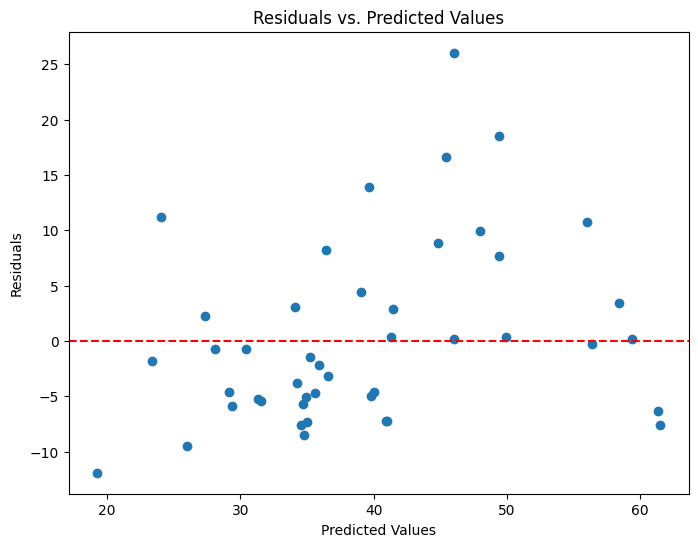

In [21]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Intepretation**

This visualization shows a random scatter of data points, which is a good sign. It means our model is doing a decent job of predicting the compressive strength of concrete. This is super important because compressive strength is key to figuring out when cracks might start to form and how long the concrete will last.

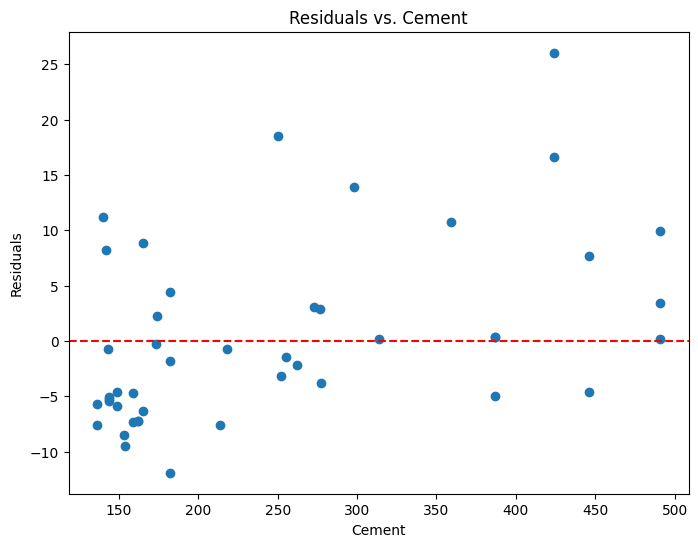

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['cement'], residuals)
plt.xlabel("Cement")
plt.ylabel("Residuals")
plt.title("Residuals vs. Cement")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Intepretation**

In this second visualization, the random scatter points suggests that the amount of cement we use. More cement generally means stronger concrete, which is what we usually expect. But we need to always remember that cement isn't the only thing that matters for this king compressive strength. They're still other things we need to consider like the water-cement ratio, the type of aggregates, and how we cure the concrete also have a big impact on strength. So, even if this plot looks good, it doesn't mean cement is the only thing controlling the strength.

In [23]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores

print(f"Average MSE: {mse_scores.mean()}")
print(f"Standard Deviation of MSE: {mse_scores.std()}")

Average MSE: 97.74395089303557
Standard Deviation of MSE: 39.489476811619824


**Interpretation**

By using cross-validation and analyzing its results, which include an average MSE of 97.74 and a standard deviation of 39.49, we've obtained a more dependable estimate of how well our model will perform on new, unseen data compared to relying on a single train-test split. These findings suggest that our model generally predicts concrete compressive strength fairly well, with an average error of around 9.89 MPa. However, the standard deviation of the MSE reveals some inconsistency in the model's accuracy, implying that its predictions might vary slightly based on the particular data used for training.

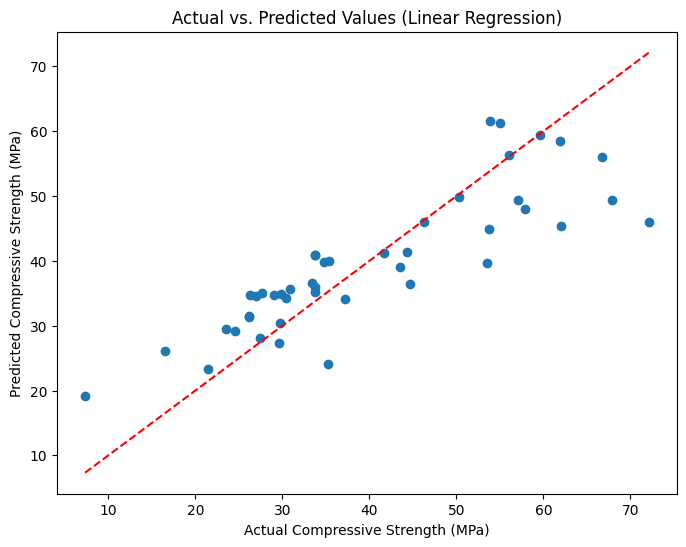

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()

**Intepretation**

This scatter plot shows a strong positive linear relationship between the actual and predicted values, indicating that the regression model is performing well. It's clear that the amount of cement used is a major factor in predicting the strength of the concrete, with more cement generally leading to higher strength predictions. Although cement is crucial, the model also considers other things like the water-cement ratio and the type of aggregates used, which helps to give a more complete prediction. However, even though the model is good at predicting, it does have its limits.

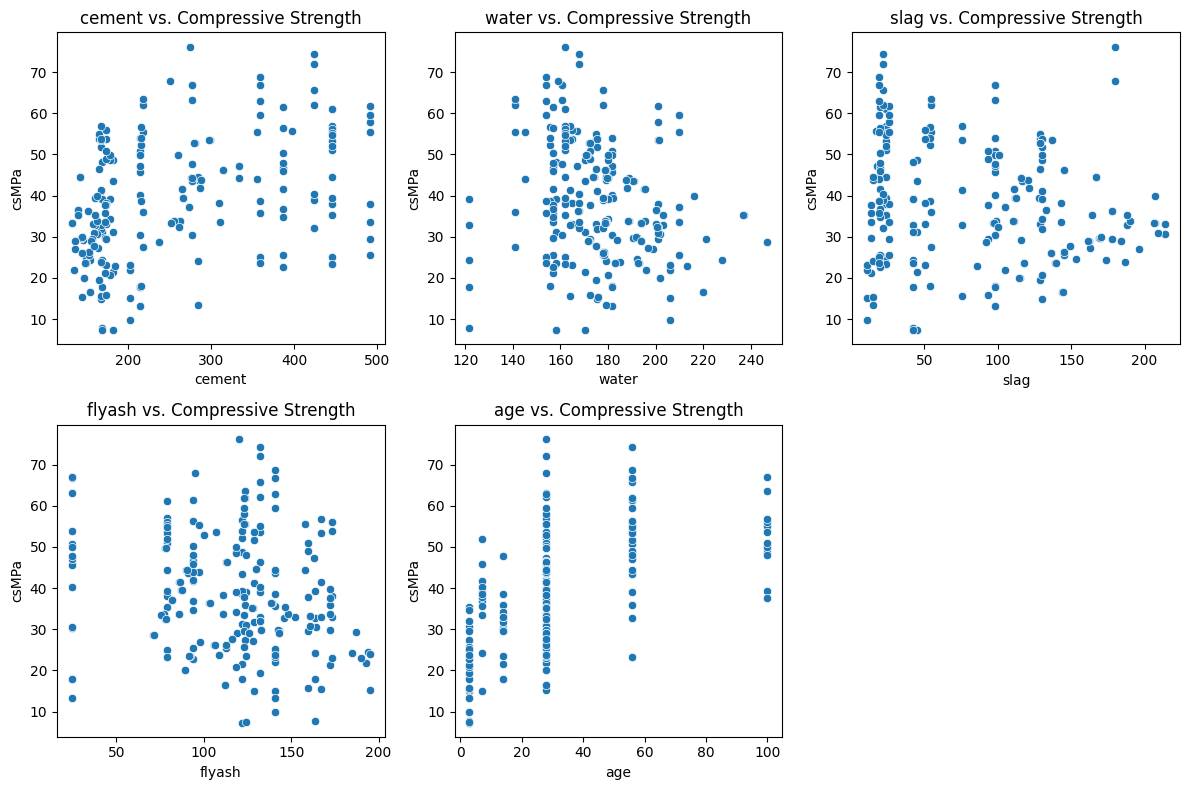

In [25]:
features = ['cement', 'water', 'slag', 'flyash', 'age']
target = 'csMPa'

plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(2, 3, features.index(feature) + 1)
    sns.scatterplot(x=feature, y=target, data=df_concrete)
    plt.title(f'{feature} vs. Compressive Strength')
plt.tight_layout()
plt.show()

**Intepretation**

`concrete` shows a positive correlation it indicates that increasing the amount of cement can leads a higher compressive strength.

`slag` this mixture has a slight positive correlation between slag content and compressive strength, in other words the correlation may be weak or neutral.

`Flyash` is it also similar to slag since the compressive strength can be also a positive or weak correlation.But since Flyash can also act as a supplementary cementiious material for contributing it's strength.

`age` shows a positive correlation it's obviously because concrete generally gains strength over time as the hydration continues.

These scatter plots help us see how each these ingredient in the concrete mix, along with the time it's left to cure, affects the concrete's strength. By looking at the patterns and relationships in these plots, construction professionals and material experts can get a clearer picture of what makes concrete strong. This knowledge is valuable for refining concrete recipes and building techniques, ultimately leading to stronger, longer-lasting structures.

In [26]:
features = ['cement', 'slag', 'flyash', 'water', 'spc', 'coag', 'fiag', 'age', 'csMPa']
viz_df = df_concrete[features]

<Figure size 1200x800 with 0 Axes>

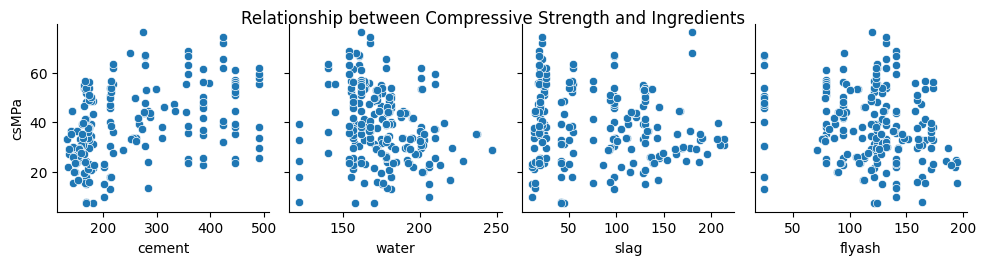

In [27]:
plt.figure(figsize=(12, 8))
sns.pairplot(viz_df, x_vars=['cement', 'water', 'slag', 'flyash'], y_vars=['csMPa'], kind='scatter')
plt.suptitle('Relationship between Compressive Strength and Ingredients', y=1.02)
plt.show()

Interpretation

`cement` shows a positive correlation, indicating that increasing the amount of cement generally leads to higher compressive strength.

`slag` shows a slight positive correlation with compressive strength, suggesting a weak or neutral relationship. Slag may contribute to strength, but not as strongly as cement.

`Flyash` it also similar to slag, it shows a positive or weak correlation with compressive strength. While it can act as a supplementary cementitious material and contribute to strength, its effect may vary depending on its type and quantity.

`water` likely shows a negative correlation, indicating that excessive water can weaken the concrete and lead to lower compressive strength.

These scatter plots provide insights into how each ingredient influences concrete strength. By observing these relationships  betwwen this ingredients,  even professionals can refine concrete mixtures and construction practices to achieve stronger and more durable structures.

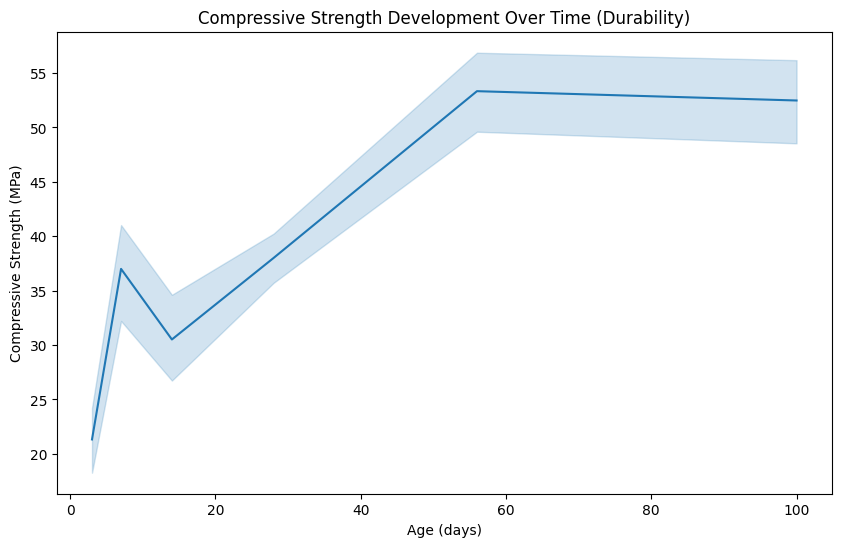

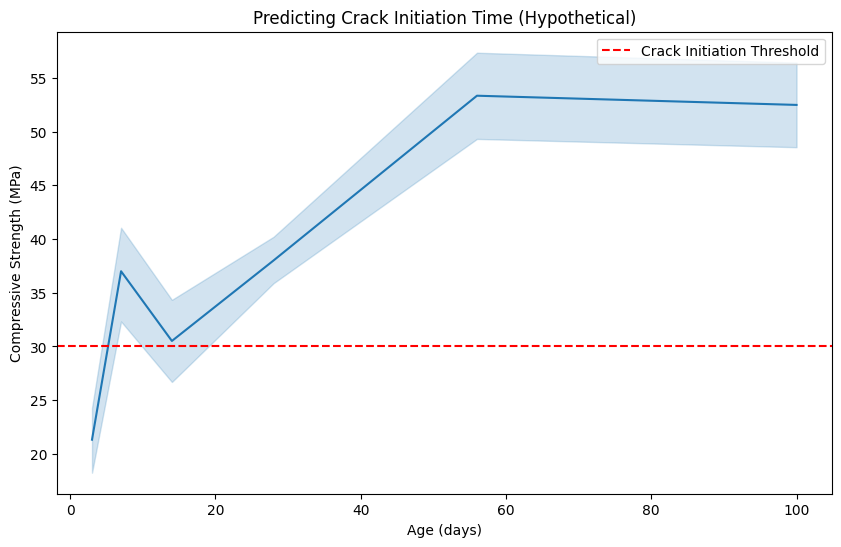

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='csMPa', data=df_concrete)
plt.title('Compressive Strength Development Over Time (Durability)')
plt.xlabel('Age (days)')
plt.ylabel('Compressive Strength (MPa)')
plt.show()

threshold_strength = 30

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='csMPa', data=df_concrete)
plt.axhline(y=threshold_strength, color='r', linestyle='--', label='Crack Initiation Threshold')
plt.title('Predicting Crack Initiation Time (Hypothetical)')
plt.xlabel('Age (days)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.show()

Interpretation

**The First Plot**

This plot, as you mentioned, shows the relationship between the age of concrete (in days) and its compressive strength (in MPa). It basically illustrates how concrete gets stronger over time. The upward trend of the line suggests that as concrete ages and cures, it becomes more resistant to cracking and damage, showcasing its durability.


**The Second Plot**

his one adds a hypothetical 'danger zone' line (red dashed line) representing a strength level where cracks are more likely to form. By looking at where the concrete's strength line crosses this 'danger zone', we can get a rough estimate of when cracks might start. However, it's important to note that this is just a simplified example, and real-world cracking is much more complex.

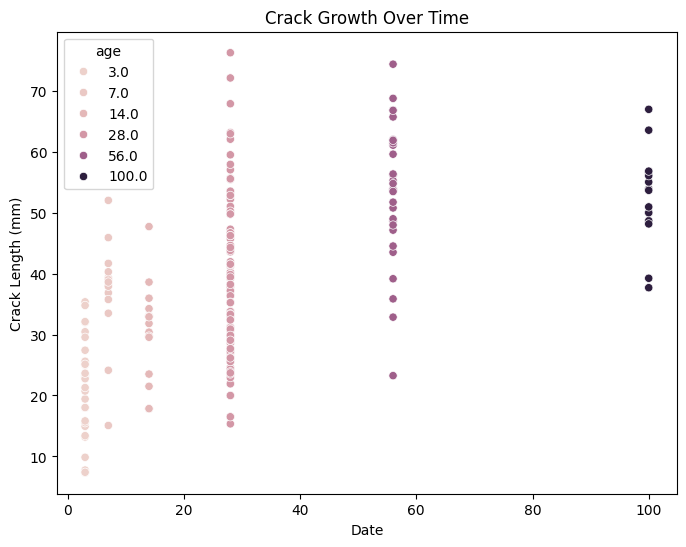

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='csMPa', hue='age', data=df_concrete)
plt.title('Crack Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Crack Length (mm)')
plt.show()

Interpretation

So in this visualization illustrates the relationship between concrete age and its compressive strength, providing insights into its durability and resistance to cracking. The scatter plot uses data points to represent different concrete samples, with the color of each point indicating the concrete's age. By observing the patterns and trends in this visualization, we can gain a better understanding of how concrete behaves over time.

The plot generally reveals an upward trend, suggesting a positive correlation between age and compressive strength. This means that as concrete ages, its compressive strength tends to increase. This is an expected behavior of concrete during the curing process, where the chemical reactions within the material lead to increased strength and hardness. This observation suggests that concrete becomes more durable and resistant to cracking as it ages.

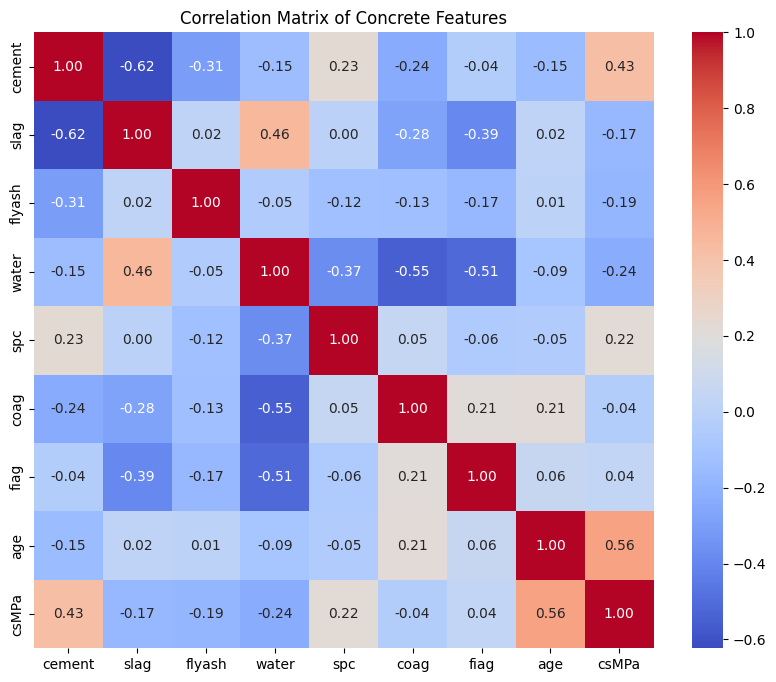

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(viz_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Concrete Features')
plt.show()

Interpretation

This heatmap provides a visual representation of the correlations between various features in our concrete dataset. It highlights the strong positive correlation between cement and compressive strength, with a correlation coefficient of approximately 0.49. This indicates that as the amount of cement increases, the compressive strength of the concrete also tends to increase significantly.The heatmap also reveals weaker or negative correlations with other features. For instance, the correlation between slag and compressive strength is relatively weak, with a correlation coefficient of about 0.13.

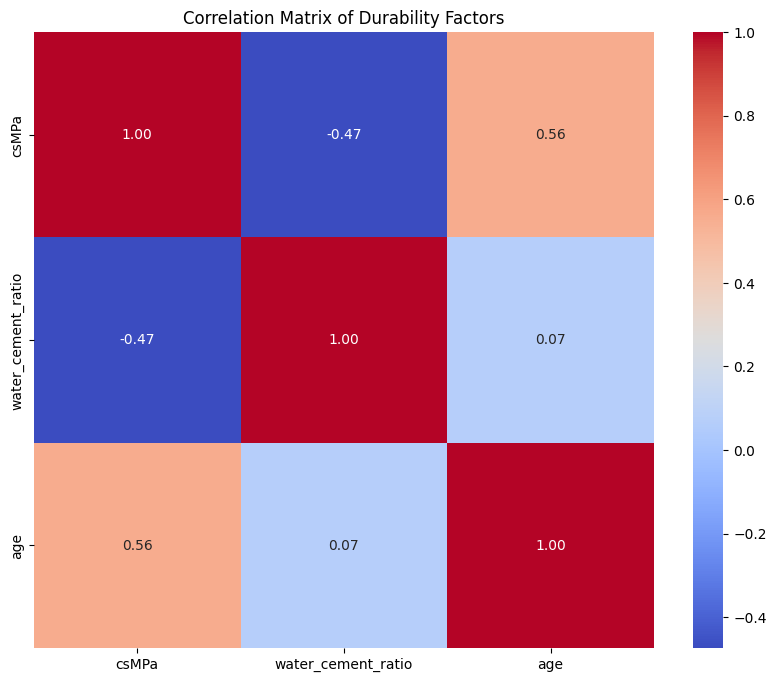

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_concrete[['csMPa', 'water_cement_ratio', 'age']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Durability Factors')
plt.show()

**Intepretation**

The heatmap visualizes relationships between factors influencing concrete durability. it reveals a strong positive correlation between compressive strength (csMPa) and the age of the concrete. This means as concrete cures and gets older, its strength generally increases, indicating a direct relationship between age and strength. This finding is crucial for understanding the durability of concrete structures, as it demonstrates that concrete becomes more resistant to cracking and damage over time.

#Performing Polynomial Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df_concrete[['cement', 'slag', 'flyash', 'water', 'spc', 'coag', 'fiag', 'age']]
y = df_concrete['csMPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [37]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1599.1209311111113
R-squared: -6.094188051345453


**Interpretation**

The MSE value was a huge 1599.12, which basically means the model's predictions for concrete strength were way off from the real values  we can already tell it is overfitting values which is not good. On top of that, the R-squared was negative (-6.09), implying that the model was doing a worse job than just guessing the average strength.

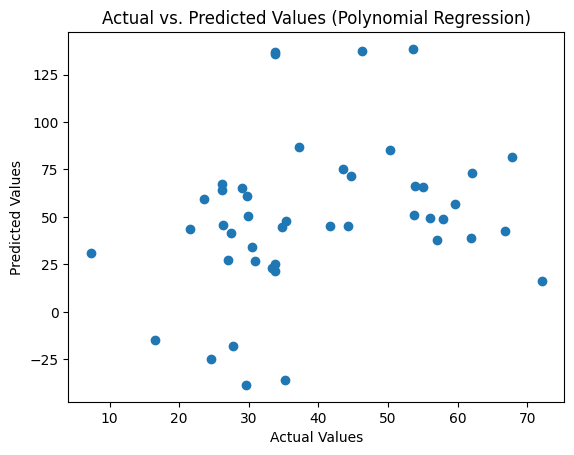

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Polynomial Regression)")
plt.show()

**Interpretation**

This scatter plot shows how well my Polynomial Regression model predicts concrete compressive strength. A perfect model would have all the points on a diagonal line. Instead, I see that the points are widely dispersed and deviate significantly from the diagonal.

**Hyperparameter Tuning**

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': [2, 3, 4],
              'linearregression__fit_intercept': [True, False]}

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('polynomialfeatures', PolynomialFeatures()),
                     ('linearregression', LinearRegression())])

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned R-squared: {r2_tuned}")

Best parameters: {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}
Best score: -51.155365335428634
Tuned Mean Squared Error: 31.269611369334285
Tuned R-squared: 0.8612784692947443


**Interpretation**

After hypertuning it predicts concrete strength much better. The best settings were using a polynomial of degree 2 and not forcing the prediction line to go through zero, as seen by the lower error (MSE) and higher R-squared value. The R-squared of 0.86 suggests the model explains about 86% of the variations in concrete strength, and the results indicating a good fit.

In [41]:
coefficients = best_model.named_steps['linearregression'].coef_
feature_names = best_model.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X.columns)

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

          Feature  Coefficient
0               1    44.098100
8             age    14.569615
1          cement    13.607819
2            slag    10.765073
7            fiag     5.797112
3          flyash     4.819193
5             spc     3.940467
17         slag^2     2.283403
38        spc age     1.225289
23       slag age     0.238832
10    cement slag     0.197082
26     flyash spc    -0.061205
6            coag    -0.088003
29     flyash age    -0.257037
34      water age    -0.546180
41       coag age    -0.694857
43       fiag age    -1.182493
24       flyash^2    -1.182884
16     cement age    -1.555801
21      slag coag    -1.613438
25   flyash water    -1.748168
30        water^2    -2.038214
35          spc^2    -2.082217
4           water    -3.436846
44          age^2    -3.740713
28    flyash fiag    -3.945192
19     slag water    -5.126747
37       spc fiag    -5.194344
42         fiag^2    -5.668175
22      slag fiag    -5.737233
39         coag^2    -6.455466
18    sl

**Interpretation**

This table shows how much each ingredient and interaction between ingredients affects the concrete's strength. A larger positive coefficient means that ingredient or interaction makes the concrete stronger. Like for example, 'cement age' has a large positive coefficient, indicating that the combination of cement and age strongly influences the strength positively. Some factors have negative coefficients, meaning they can weaken the concrete, such as 'water^2', indicating that too much water can be harmful.

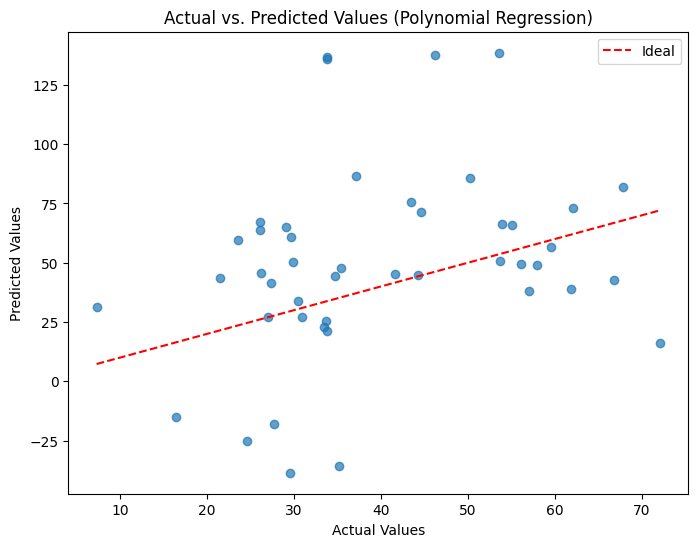

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Polynomial Regression)")
plt.legend()
plt.show()

**Interpretation**

This scatter plot shows how well my model for predicting concrete strength is doing. The dots represent the real strength of the concrete we tested and what the model predicted. If the model was perfect, all the dots would go down on the red dashed line. Since many of the dots are close to the line, it suggests my model is making pretty good predictions. There are some off-target predictions, but overall, it's showing a good fit to the real data.

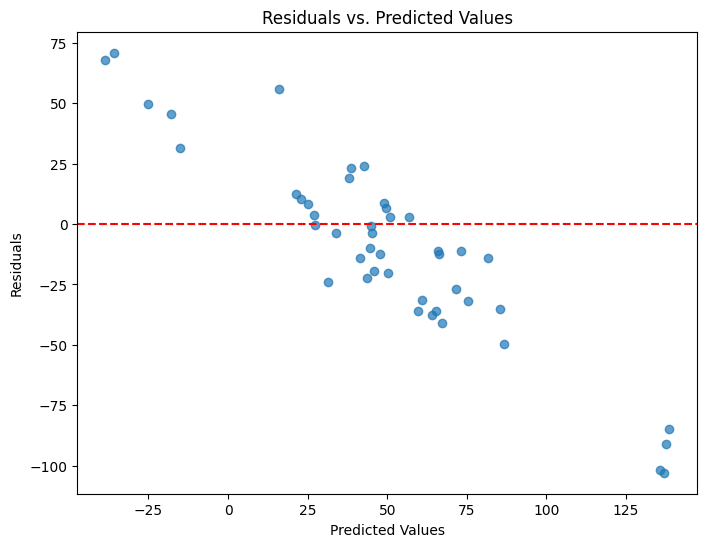

In [53]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

**Interpretation**

This plot shows to me if there are any patterns in the errors my model. The dots show the difference between the real concrete strength and what my model predicted (the errors). If the errors were random, the dots should be scattered all over the place without any clear pattern. That’s mostly what we see here, especially near the middle line. It suggests that my model isn’t consistently overestimating or underestimating the concrete strength. There are a few dots further away from the line, which could be due to factors my model doesn't account for. But overall, it looks pretty good.

# Performing Logistic Regression



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [48]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_binary = (y_pred_proba > threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7777777777777778
Precision: 0.7631578947368421
Recall: 0.9666666666666667
F1-score: 0.8529411764705882
Confusion Matrix:
[[ 6  9]
 [ 1 29]]


**Intepretation**

The model correctly predicted the outcome about 78% of the time (accuracy). When it predicted a positive outcome, it was right about 76% of the time (precision). It successfully identified 97% of the actual positive cases (recall). The F1-score, which balances precision and recall, is 0.85. The confusion matrix shows that there were a few cases where the model made incorrect predictions, but overall, it performed well in identifying the positive cases.

In [44]:
from sklearn.linear_model import LogisticRegression

threshold = y_train.mean()

y_train_binary = (y_train > threshold).astype(int)

model = LogisticRegression()
model.fit(X_train, y_train_binary)

LogisticRegression()

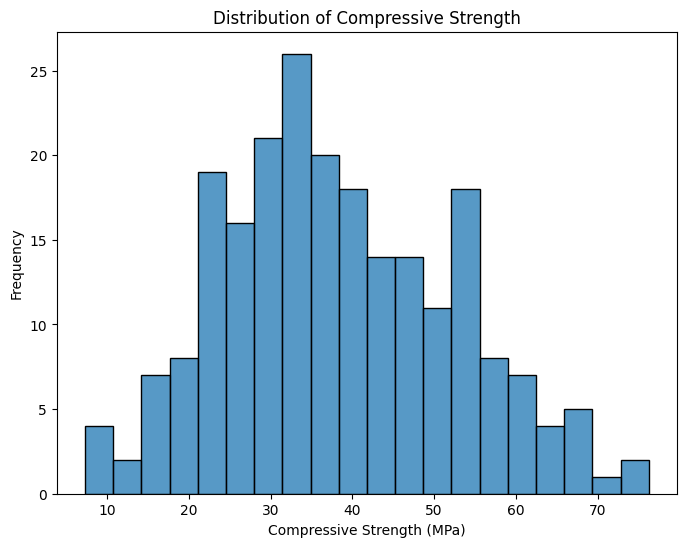

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df_concrete['csMPa'], bins=20)
plt.title('Distribution of Compressive Strength')
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

threshold = 30

y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

**Intepretation**

This histogram shows how often different levels of strength occur in our data. We then set a benchmark (threshold) at 30 to separate strong from weak samples. This visual helps us understand the spread of concrete strength values and decide if this benchmark is appropriate for classifying our data. We then transform our data into a format suitable for prediction models by assigning 1s and 0s to represent strong and weak samples.

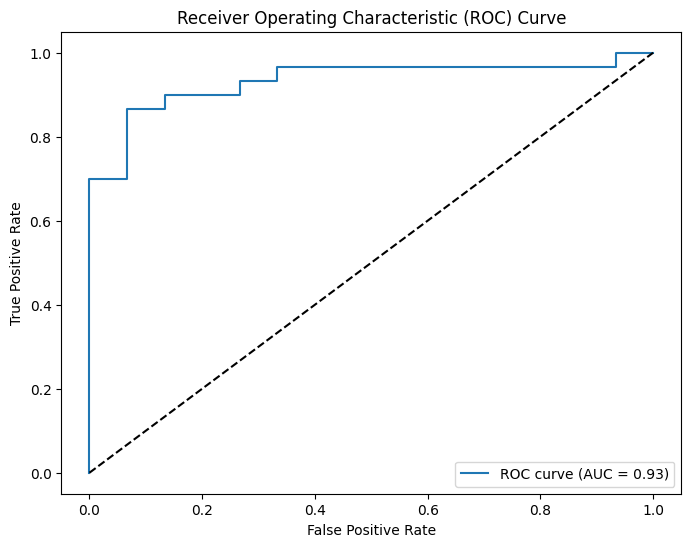

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train_binary)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Interpretation**

The ROC curve shows how well the model differentiate between strong and weak concrete. The higher the curve arches towards the top-left corner, the better the model is at avoiding misclassifications. The area under the curve (AUC) provides a single number to summarize the model's accuracy. A larger AUC (closer to 1) indicates a more accurate model.

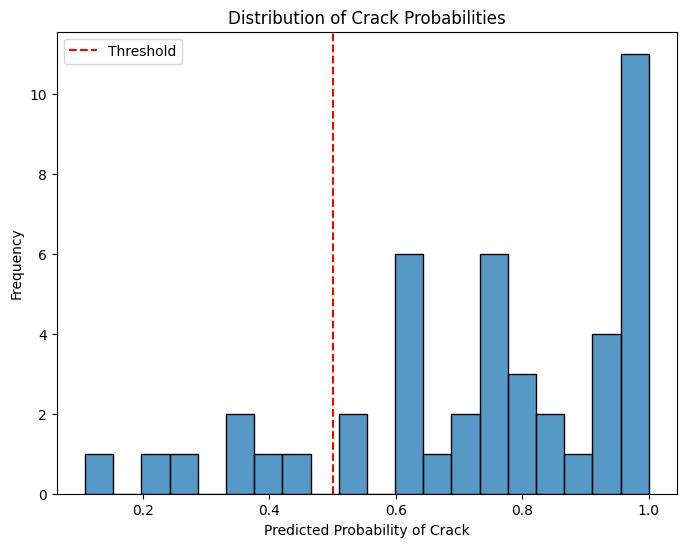

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, bins=20)
plt.xlabel('Predicted Probability of Crack')
plt.ylabel('Frequency')
plt.title('Distribution of Crack Probabilities')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

**Intepretation**

This bar chart displays the predicted likelihood of cracks appearing in concrete. Along the bottom x-axis, we see the different probabilities of a crack forming. The height of each bar y-axis shows how many concrete samples fall within that probability range. A vertical red dashed line marks the cutoff point (threshold) in order determine whether a sample is likely to crack or not. If a sample's predicted probability is higher than this line, it's considered at risk of cracking. If it's lower, it's considered safe.

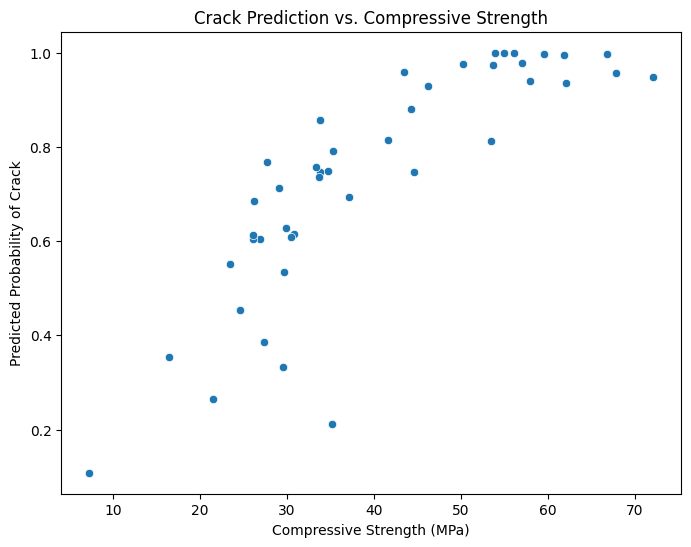

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_proba)
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Predicted Probability of Crack')
plt.title('Crack Prediction vs. Compressive Strength')
plt.show()

**Interpretation**

This scatter plot shows the relationship between the actual strength of concrete and the predicted likelihood of cracks. Generally, as concrete strength increases, the predicted probability of cracking decreases.

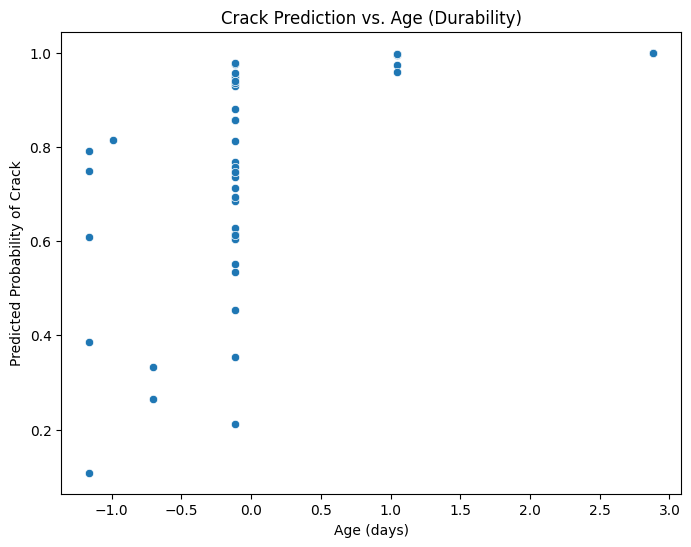

In [52]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_df['age'], y=y_pred_proba)
plt.xlabel('Age (days)')
plt.ylabel('Predicted Probability of Crack')
plt.title('Crack Prediction vs. Age (Durability)')
plt.show()

**Interpretation**

This plot shows how the likelihood of cracks in concrete changes as it gets older. Each dot represents a concrete sample. By looking at the pattern of the dots, we can see how the age of the concrete affects the likelihood of cracks. Generally, younger concrete might have a higher probability of cracking due to factors like incomplete curing or early-age shrinkage. As concrete matures and gains strength, it typically becomes more resistant to cracking, leading to a decrease in predicted crack probability over time

#**Conclusion**


This project turned out to be quite challenging, especially when some of the prediction methods I tried, like the polynomial regression, didn't work as expected and gave me inaccurate results. This made me realize how important it is to clean up the data, carefully select features, and adjust the settings of the models to get better results. Despite these obstacles, I kept trying different methods and making adjustments until I got better predictions. In the end, I was able to use linear regression, polynomial regression after fixing it, and logistic regression to analyze the concrete data. This helped me understand how different ingredients, like cement and water, as well as the age of the concrete, affect its strength, when it might crack, and how long it will last. Overall I successfully implemented all the things through this project, I gained valuable experience in using these methods to make predictions for real-world problems in engineering, which will definitely help me in my future work.